# **Wonderful Wines of the World**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import requests
from math import ceil

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer

# Project Plan

| Phase | Deliverable |
| :--- | :--- |
| Business Understanding | Background |
| | Business Objectives and Success Criteria |
| | Assumptions and Constrains |
| | Data Mining Goals and Success Criteria |
| | Data Mining Success Criteria |
| Data Understanding | Data Description |
| | Exploratory Analysis |
| Data Preparation | Select Data |
| | Clean Data |
| | Construct Data |
| Modeling | Select Modeling Techniques |
| | Build Model |
| | Assess Models |
| Evaluation | Evaluate Results |
| | Cluster Analysis |
| Deployment | Marketing Strategies |

### **Import Dataset**

In [2]:
# load dataset
df = pd.read_excel("WonderfulWinesoftheWorld.xlsx")
df.head()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Kidhome      10001 non-null  float64
 6   Teenhome     10001 non-null  float64
 7   Freq         10001 non-null  float64
 8   Recency      10001 non-null  float64
 9   Monetary     10001 non-null  float64
 10  LTV          10001 non-null  float64
 11  Perdeal      10001 non-null  float64
 12  Dryred       10001 non-null  float64
 13  Sweetred     10001 non-null  float64
 14  Drywh        10001 non-null  float64
 15  Sweetwh      10001 non-null  float64
 16  Dessert      10001 non-null  float64
 17  Exotic       10001 non-null  float64
 18  WebPurchase  10001 non-null  float64
 19  WebV

In [4]:
#ProfileReport(df)

# Data Preprocessing

In [5]:
# remove last row since it represents average values for each column
df.drop(df.tail(1).index, inplace = True)
df

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1383.0,1132.0,57.0,20.0,81033.0,0.0,1.0,19.0,59.0,776.0,...,1,0,0,0,0,1,0,1,0,0.820415
9996,4070.0,596.0,66.0,15.0,84714.0,0.0,0.0,18.0,45.0,720.0,...,0,0,0,0,0,0,0,0,0,0.905248
9997,7909.0,619.0,18.0,12.0,40466.0,0.0,0.0,3.0,65.0,47.0,...,0,0,0,0,0,0,0,0,0,0.679388
9998,4158.0,1107.0,33.0,16.0,53661.0,1.0,0.0,1.0,368.0,15.0,...,0,0,0,0,0,0,0,0,0,0.016766


In [6]:
conv_cols = ['Kidhome', 'Teenhome']
df[conv_cols] = df[conv_cols].applymap(np.int64)

In [7]:
non_metric_features = df.select_dtypes(exclude=['float64']).columns.to_list()

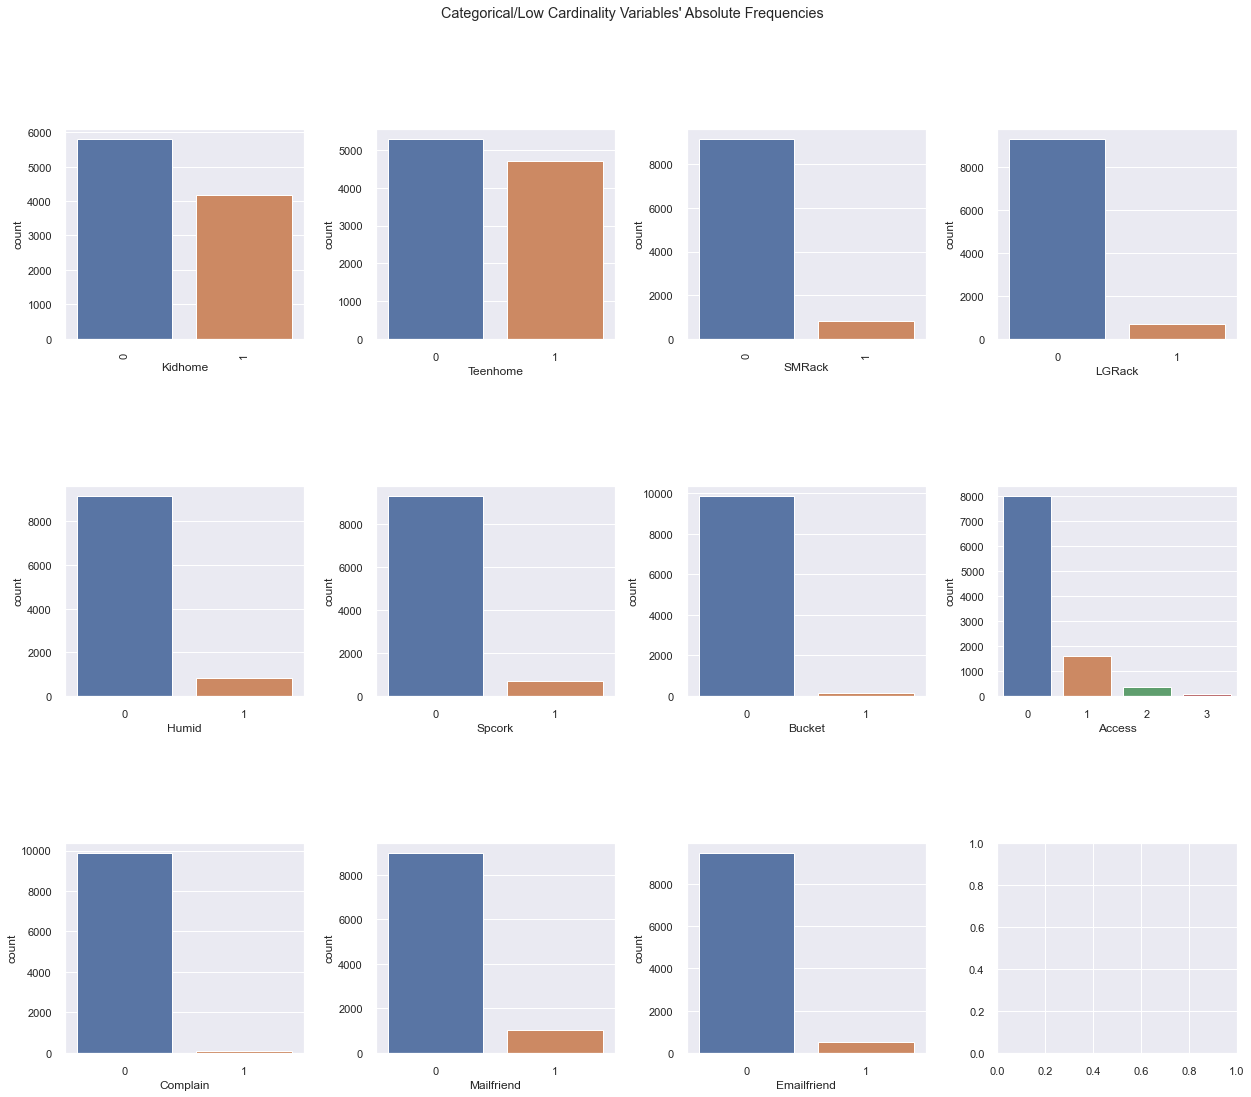

In [8]:
# All Non-Metric/ Low Cardinality Variables' Absolute Frequencies
sns.set()

features = non_metric_features
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=df[feat], ax=ax)

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

In [9]:
df['Child'] = np.where((df['Kidhome']==1) | (df['Teenhome']==1), 1, 0)

In [10]:
df.head()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand,Child
0,5325.0,653.0,55.0,20.0,78473.0,0,0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0.240092,0
1,3956.0,1041.0,75.0,18.0,105087.0,0,0,36.0,33.0,1852.0,...,0,0,1,0,0,0,0,0,0.435944,0
2,3681.0,666.0,18.0,12.0,27984.0,1,0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0.350584,1
3,2829.0,1049.0,42.0,16.0,61748.0,1,1,2.0,46.0,37.0,...,0,0,0,0,0,0,1,1,0.594082,1
4,8788.0,837.0,47.0,16.0,65789.0,0,1,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0.782248,1


In [11]:
# separate binary/ordinal and continuous and drop CustID
df_num = df.iloc[:,1:20]
df_num.drop(columns=["Kidhome", "Teenhome"], inplace=True)

## Scaling the Data

In [12]:
from sklearn import preprocessing
df_before = df_num.copy()

cols = df_num.columns
rows = df_num.index

dic = {}
i = 0

for element in cols:
    dic[i]=element
    i = i + 1

x = df_num.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled = df_scaled.rename(columns=dic)
df_scaled.head()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
0,0.147143,0.616667,1.00,0.524183,0.345455,0.032787,0.269206,0.316404,0.072165,0.673469,0.053333,0.342466,0.032258,0.012987,0.010417,0.380952,0.5
1,0.701429,0.950000,0.75,0.727922,0.636364,0.060109,0.606041,0.364144,0.020619,0.489796,0.000000,0.616438,0.016129,0.038961,0.000000,0.190476,0.4
2,0.165714,0.000000,0.00,0.137673,0.054545,0.102004,0.010834,0.086846,0.907216,0.030612,0.386667,0.178082,0.516129,0.272727,0.500000,0.666667,0.8
3,0.712857,0.400000,0.50,0.396148,0.018182,0.083789,0.010177,0.087354,0.721649,0.867347,0.013333,0.136986,0.016129,0.012987,0.572917,0.654762,0.7
4,0.410000,0.483333,0.50,0.427083,0.018182,0.005464,0.009849,0.092433,0.360825,0.857143,0.000000,0.150685,0.032258,0.012987,0.291667,0.702381,0.6


<AxesSubplot:xlabel='variable', ylabel='value'>

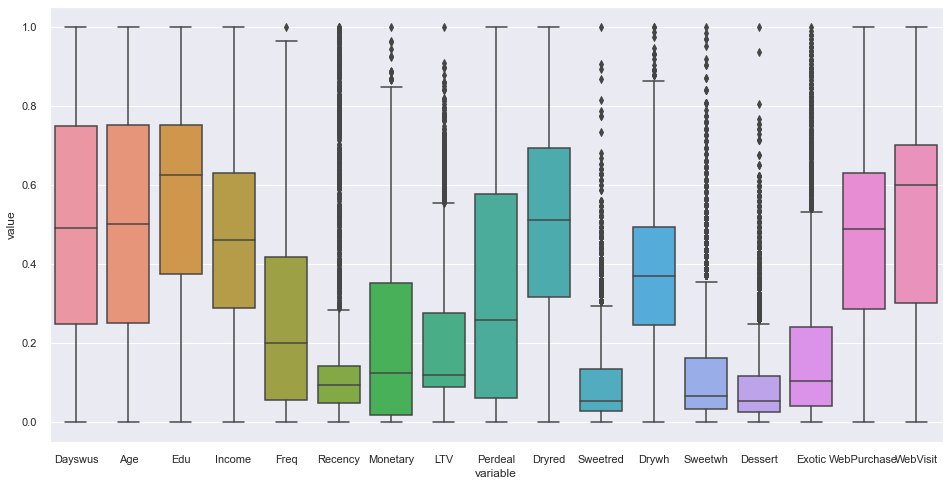

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df_scaled), ax=ax)

## Dimensionality Reduction

<AxesSubplot:>

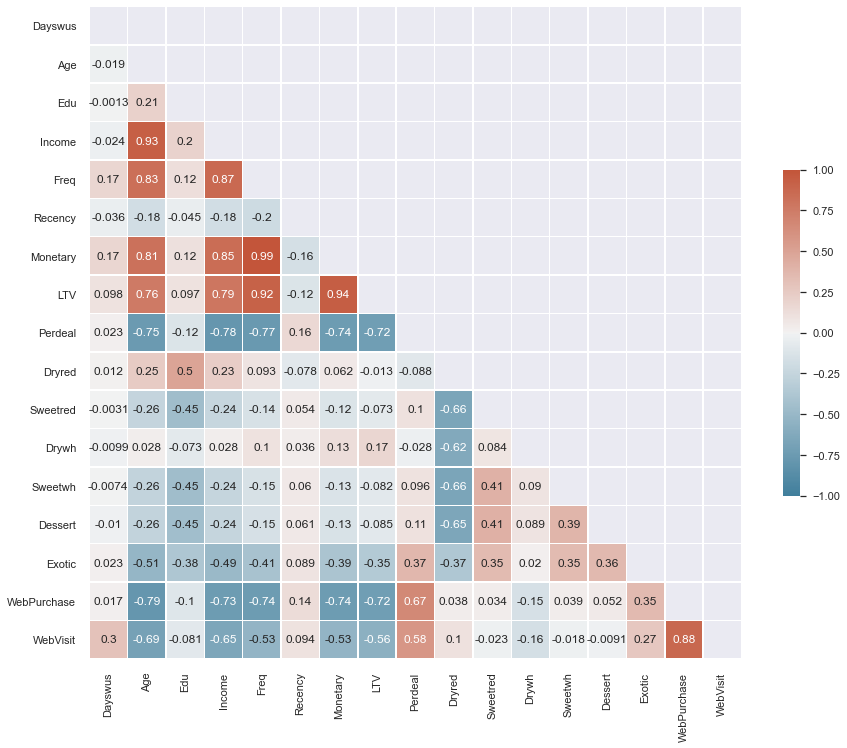

In [14]:
# Correlation Matrix

# Compute the correlation matrix
corr = df_scaled.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

One can see that features such as Income and Age or Monetary and Frequency are highly correlated with each other. There might be a merit in discarding those variables, because including nearly-redundant variables can cause the PCA to overemphasize their contribution.

In [15]:
df1 = df_scaled.drop(columns=["Income", "LTV", "Recency", "Dayswus", "WebVisit"])

## Performing PCA for Dimensionality Reduction

In [16]:
# PCA
def explained_variance(dataframe):
    "Calculates the Eigenvalues for each Principal Component in a dataframe."
    
    pca = PCA()
    pca_feat = pca.fit_transform(dataframe)
    
    return np.cumsum(pca.explained_variance_ratio_), pca.n_components_

In [17]:
def get_principal_components(dataframe, nPC):
    """Gets PC values for each observation in dataframe and creates new dataframe."""
    
    pca = PCA(nPC)
    pca_feat = pca.fit_transform(dataframe)
    pca_names = [f"PC{i}" for i in range(pca.n_components_)]
    pca_df = pd.DataFrame(pca_feat, index=dataframe.index, columns=pca_names)
    return pca_df

In [18]:
# noch graph einbauen damit das visuell schön aussieht
print(explained_variance(df1)[0].round(3))

[0.514 0.724 0.803 0.852 0.89  0.925 0.954 0.972 0.987 1.    1.    1.   ]


In [19]:
# get pc explaining 80% of the variance
pca_num = get_principal_components(df1, 3)
pca_num.head()

,PC0,PC1,PC2
0,0.389565,-0.332765,0.176738
1,0.852400,0.082875,0.230937
2,-1.002513,0.656097,-0.327440
3,-0.505874,-0.367367,-0.335385
4,-0.251796,-0.370861,-0.344171


## TSNE

In [20]:
# TSNE
tsne_data = TSNE(random_state=10).fit_transform(pca_num)

x = tsne_data[:,0]
y = tsne_data[:,1]

/opt/anaconda3/envs/Business_Cases/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

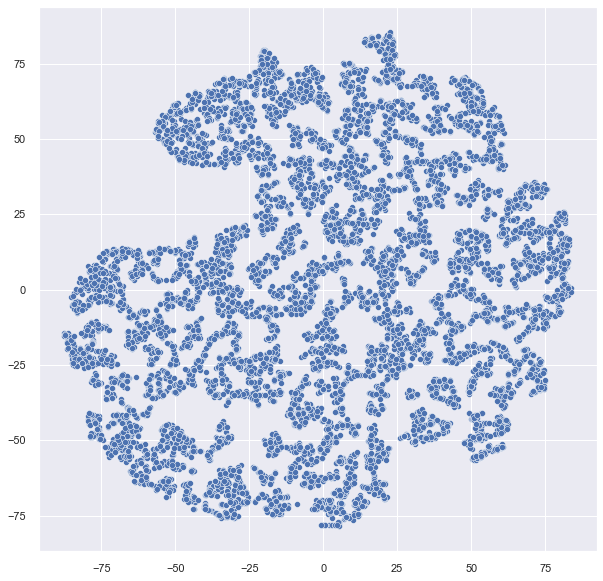

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x,y)

# Clustering

## K-Means

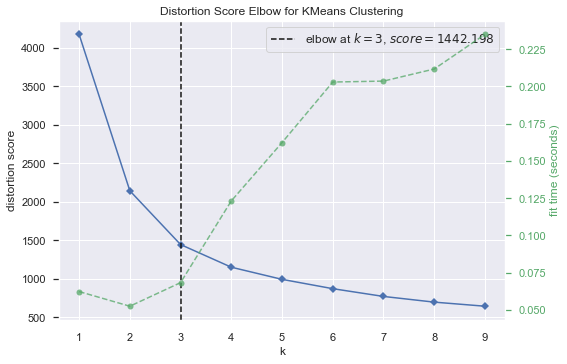

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# KMEANS Elbow

test = pca_num

model = KMeans(test)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(test)    
visualizer.show()       # Finalize and render the figure

In [23]:
number_clusters = 3
kmclust = KMeans(
    n_clusters=number_clusters, 
    init='k-means++',
    n_init=10, 
    random_state=27,
    tol= 1e-4)
km_labels = kmclust.fit_predict(pca_num)
km_labels

array([2, 1, 0, ..., 0, 0, 1], dtype=int32)

### Visualizing Cluster Membership with TSNE

In [24]:
clusters = pd.concat((df_num, pd.Series(km_labels, name='labels')), axis=1)

In [25]:
tsne_clusters = TSNE(random_state=20).fit_transform(pca_num)

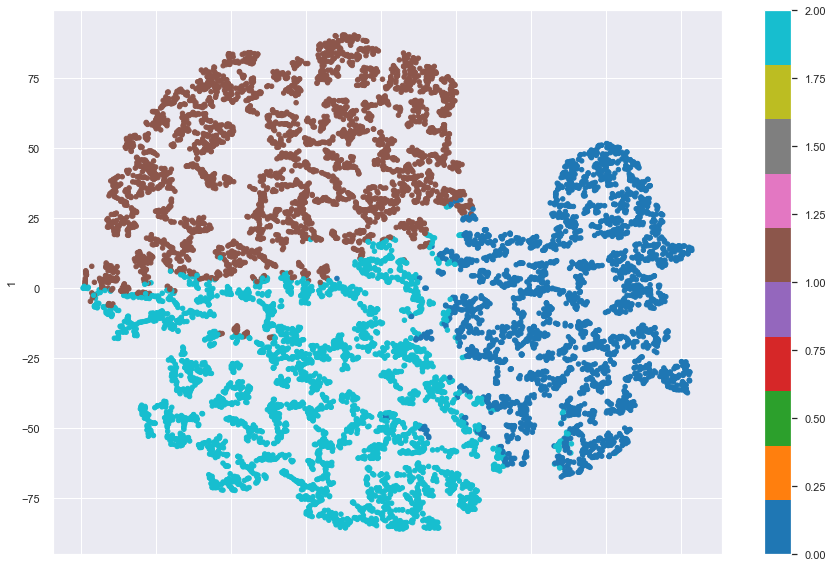

In [26]:
# t-SNE visualization
pd.DataFrame(tsne_clusters).plot.scatter(x=0, y=1, c=clusters['labels'], colormap='tab10', figsize=(15,10))
plt.show()

### Evaluating K-Means for k=3 Clusters

In [27]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [28]:
pc_kmeans = pd.concat((pca_num, pd.Series(km_labels, name='labels')), axis=1)
sst = get_ss(pc_kmeans.drop(columns=["labels"]))  # get total sum of squares
ssw_labels = pc_kmeans.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("R^2 kmeans:", r2)

R^2 kmeans: 0.6543370681181243


## Hierarchical Clustering
#### muss nochmal überabreitet werden

In [29]:
sample_20 = pca_num.sample(frac=1, replace=False)

In [30]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(pca_num)

array([9582, 8709, 8355, ...,    2,    1,    0])

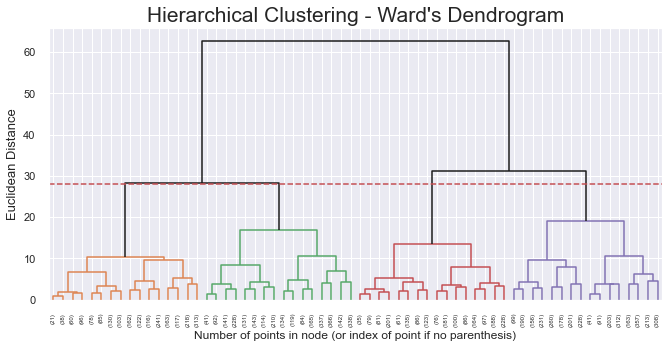

In [31]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 28
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

## DBSCAN

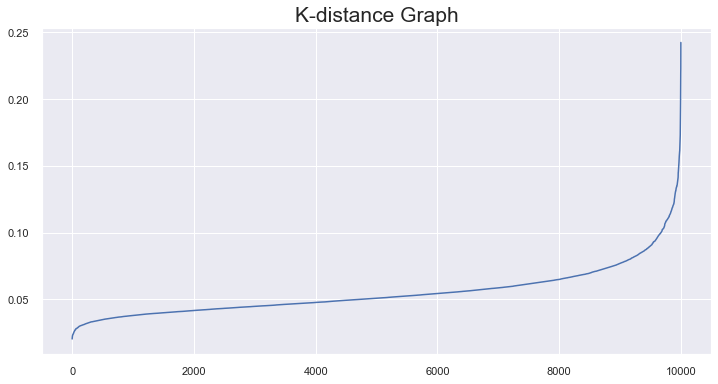

In [32]:
# K-distance graph to find out the right eps value
# neighbors 6 since we have 3 dimensions  
neigh = NearestNeighbors(n_neighbors=6)
neigh.fit(pca_num)
distances, _ = neigh.kneighbors(pca_num)
distances = np.sort(distances[:, -1])

fig = plt.figure(figsize=(12,6))
plt.title("K-distance Graph", fontsize=21)
plt.plot(distances)
plt.show()

In [33]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.08, min_samples=6, n_jobs=4)
dbscan_labels = dbscan.fit_predict(pca_num)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 3


In [34]:
scan_concat = pd.concat([pca_num, pd.Series(dbscan_labels, index=df.index, name="labels")], axis=1)
scan_concat.labels.value_counts()

 0    9645
-1     350
 1       5
Name: labels, dtype: int64

### Evaluating DBSCAN

In [35]:
sst = get_ss(scan_concat.drop(columns=["labels"]))  # get total sum of squares
ssw_labels = scan_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("R^2 DBSCAN:", r2)

R^2 DBSCAN: 0.0029506384462175675


After running the DBSCAN with the predefined number of neighbors on the dataset it estimated 2 clusters, one of which only representing the outliers, with a resulting R-squared of 0.3%. DBSCAN isn't the model to go with in this project. This makes sense if we take a glimpse at the TSNE Chart plotted above. 

## Comparing Clusterers

In [36]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

In [37]:
hierarchical = AgglomerativeClustering(
    affinity='euclidean')

In [38]:
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(pca_num, kmclust)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        pca_num, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.486901,0.214334,0.461985,0.000087,0.471378
3,0.654337,0.518873,0.600254,0.000483,0.588041
4,0.724879,0.664110,0.685985,0.000536,0.683515
5,0.762721,0.715235,0.726831,0.000778,0.727450
6,0.791865,0.730988,0.747939,0.000846,0.761872
7,0.815845,0.748666,0.748005,0.000977,0.783266
8,0.833632,0.772507,0.777162,0.001080,0.796798
9,0.846281,0.794466,0.803161,0.001377,0.810072


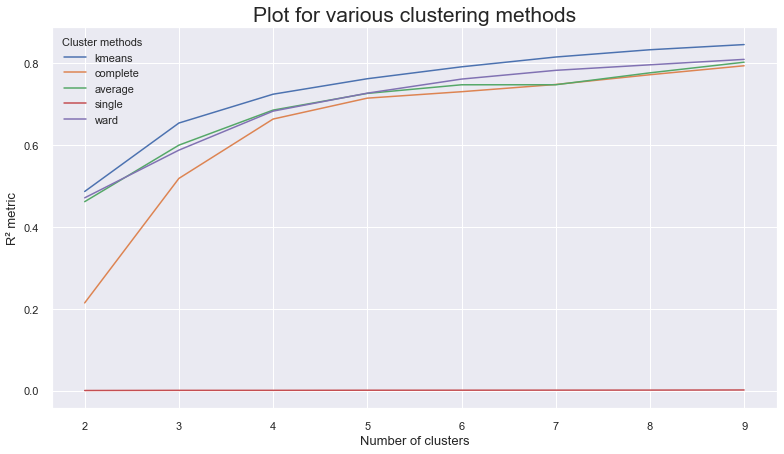

In [39]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(13,7))

plt.title("Plot for various clustering methods", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

One can clearly see that K-Means provides the best results when clustering the given datatset. DBSCAN isn't represented in this plot since it performs really porly as seen above. In the further process of this project and to perform the cluster analysis we will therefore use the **K-Means method with k=3 clusters**. 

# Cluster Analysis

## Assess Feature Importance

In [40]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

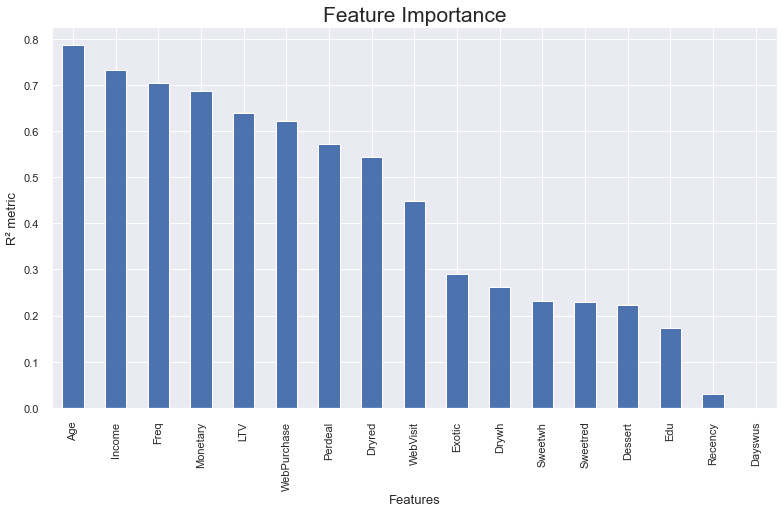

In [41]:
feature_importance = pd.concat((df_scaled, pd.Series(km_labels, name='labels')), axis=1)
feature_importance = r2_variables(feature_importance, "labels").sort_values(ascending=False).drop(["labels"])
feature_importance.to_frame().plot.bar(figsize=(13,7))
plt.title("Feature Importance", fontsize=21)
plt.legend().remove()
plt.xlabel("Features", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

# Overview

In [42]:
clusters.labels.value_counts()

2    3536
1    3494
0    2970
Name: labels, dtype: int64

In [43]:
cluster_means = clusters.groupby("labels").mean()
cluster_means

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
labels,,,,,,,,,,,,,,,,,
0,896.751852,28.642761,15.635354,40350.769360,4.088215,80.229966,88.813468,1.044781,57.322559,29.408081,12.128956,34.080135,12.328283,12.051178,30.523569,56.844444,6.687542
1,904.352604,66.675730,16.835146,98907.273612,27.896394,50.057813,1338.967945,525.390956,5.685461,46.499141,7.109330,32.549800,6.997710,6.827991,8.420721,22.848598,3.117630
2,893.059672,45.599265,17.571267,66068.942590,10.370192,59.638857,362.958710,71.236708,37.856052,71.837387,2.738122,19.871606,2.724265,2.778563,12.836256,49.519514,6.055147


In [44]:
cluster_means = cluster_means.append(df_before.mean(), ignore_index=True)
cluster_means["Cluster"] = ["Cluster 0", "Cluster 1", "Cluster 2", "Average"]

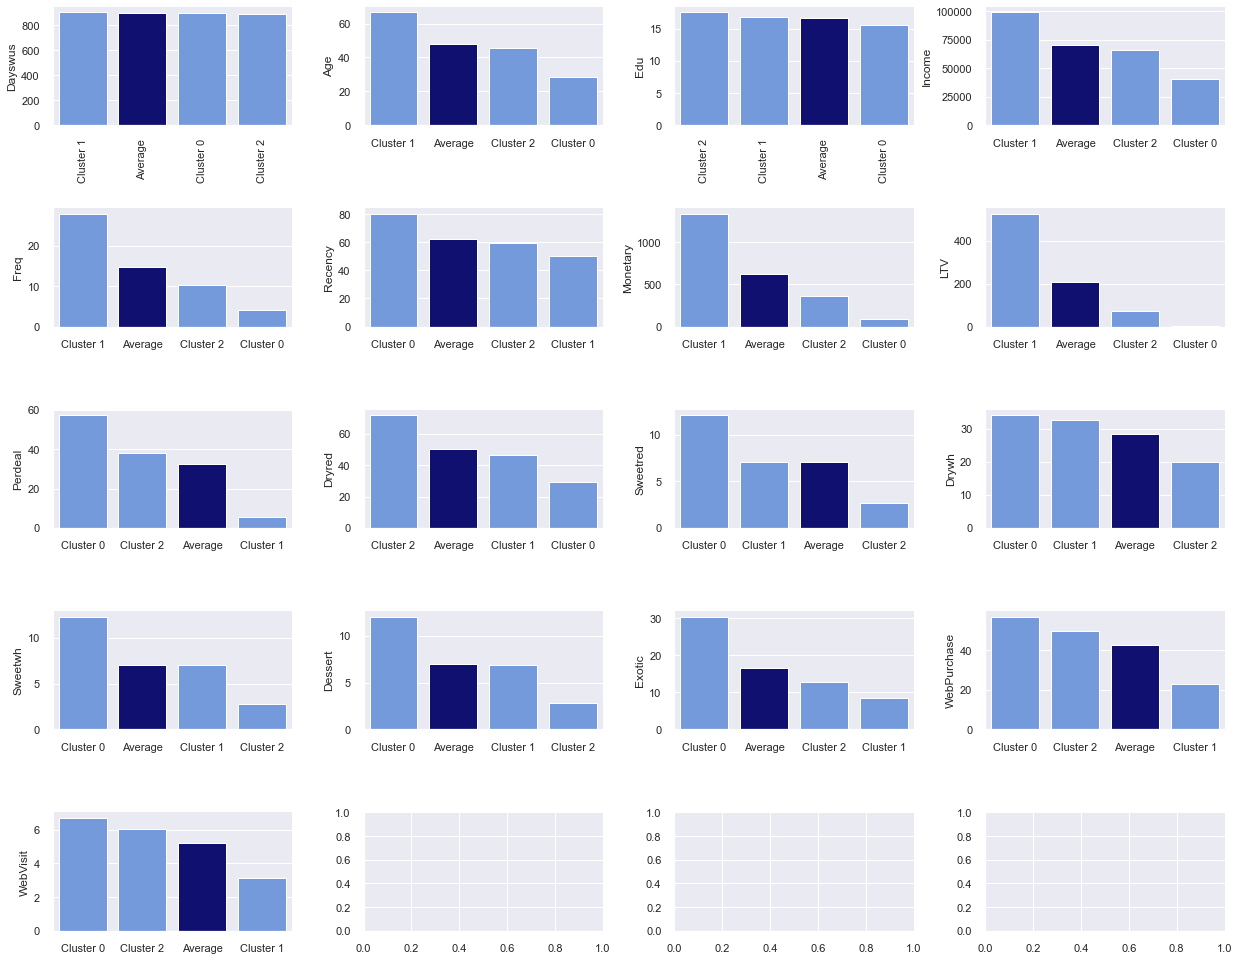

In [45]:
#ceil(len(features) / 3
fig, axes = plt.subplots(5, ceil(len(features) / 3), figsize=(21, 17))

metric_features = df_before.columns.to_list()
for ax, feat in zip(axes.flatten(), metric_features):
    sns.barplot(x="Cluster", y = feat, data=cluster_means.sort_values(feat, ascending=False), 
                palette=["cornflowerblue" if x!='Average' else 'navy' for x in cluster_means.sort_values(
                feat, ascending=False).Cluster], 
                ax=ax).set(xlabel='')
    sns.despine(right=True)
    
#title = "Cluster Comparison to Mean of Feature"
#plt.suptitle(title)

# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
#axes.flatten()[1].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

## Socio-Demographic Perspective

In [46]:
child = df['Child']
socio_demo = clusters.copy()
socio_demo = socio_demo.merge(child, how='outer', left_index=True, right_index=True)
socio_demo = socio_demo.groupby("labels").agg({"labels": "count",
                                "Age": "mean",
                                "Income": "mean",
                                "Edu": "mean",
                                "WebPurchase": "mean",
                                "WebVisit": "mean",
                                "Child": "mean"  
                               })
socio_demo
# keine Sorge hier kommen noch die plots hin

,labels,Age,Income,Edu,WebPurchase,WebVisit,Child
labels,,,,,,,
0,2970,28.642761,40350.769360,15.635354,56.844444,6.687542,0.865993
1,3494,66.675730,98907.273612,16.835146,22.848598,3.117630,0.337722
2,3536,45.599265,66068.942590,17.571267,49.519514,6.055147,0.933824


In [47]:
# 0: young, lowest lifetime value, purchase web
# 1: really old, no websearch, almost no webpurchase, og, highest income, CASH COW (LTV)
# 2: 40-50, 2nd highest income - mittel zwischen den bei

# -> 1 und 2 haben kinder home

### RFM Perspective

In [68]:
rfm_ltv = clusters.groupby("labels").agg({"labels": "count",
                                "Recency": "mean",
                                "Freq": "mean",
                                "Monetary": "mean",
                                "LTV": "mean"})
rfm_ltv

,labels,Recency,Freq,Monetary,LTV
labels,,,,,
0,2970,80.229966,4.088215,88.813468,1.044781
1,3494,50.057813,27.896394,1338.967945,525.390956
2,3536,59.638857,10.370192,362.958710,71.236708


In [49]:
# Kanns auch standartisieren für die plots
scaled_w_clusters = pd.concat((df_scaled, pd.Series(km_labels, name='labels')), axis=1)

In [50]:
rfm = scaled_w_clusters.groupby("labels").agg({"labels": "count",
                                          "Recency": "mean",
                                          "Freq": "mean",
                                          "Monetary": "mean",
                                          "LTV": "mean"                                                       
})
rfm

,labels,Recency,Freq,Monetary,LTV
labels,,,,,
0,2970,0.146138,0.056149,0.027188,0.090932
1,3494,0.091180,0.489025,0.437613,0.357233
2,3536,0.108632,0.170367,0.117189,0.126580


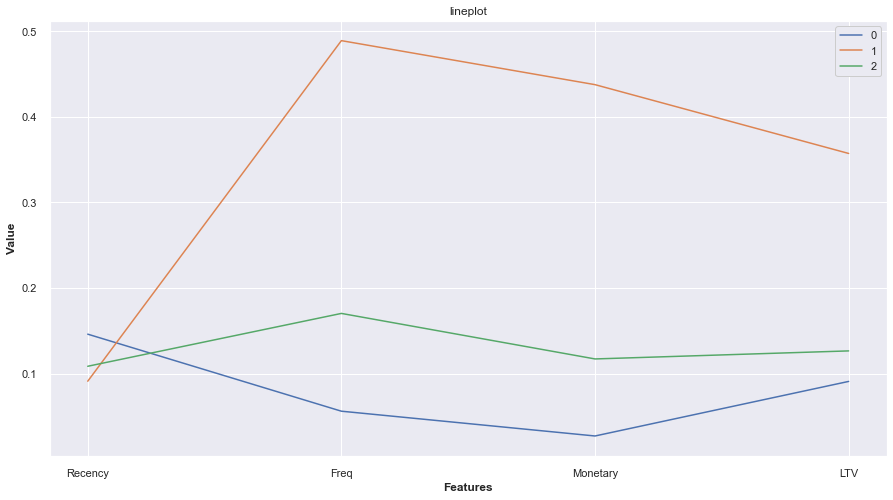

In [51]:
plt.subplots(figsize=(15,8))

sns.color_palette("Paired")
sns.lineplot(data=rfm.drop(columns=["labels"]).T, dashes=False)

plt.xlabel('Features', fontweight ='bold') 
plt.ylabel('Value', fontweight ='bold') 

plt.title("lineplot")
plt.legend(framealpha=1, frameon=True)
plt.show()

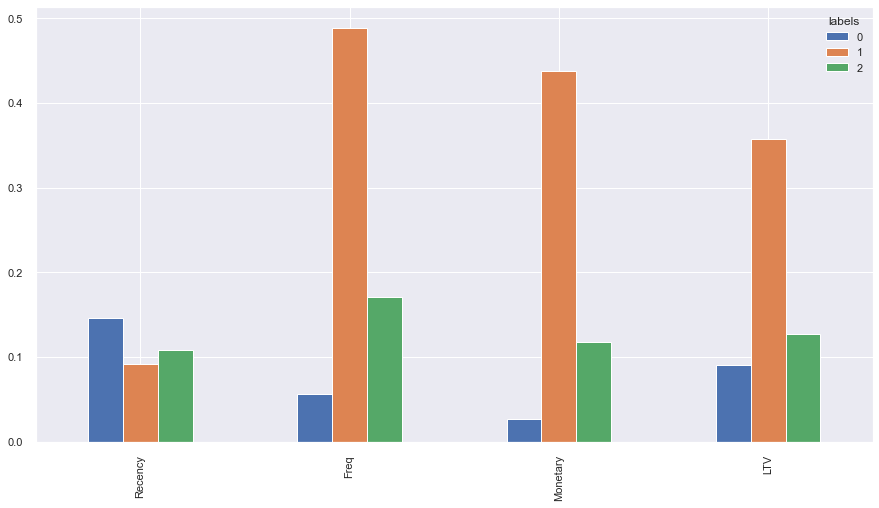

In [52]:
rfm.drop(columns=["labels"]).T.plot(kind="bar", figsize=(15,8))
plt.show()

In [53]:
# 0: less recent, not frequent, no money
# 1: most recent, most money, most frequent, highest LTV ergo CASH COW
# 2: second recent everywhere

### Taste Perspective

In [67]:
taste = clusters.groupby("labels").agg({"labels": "count",
                                "Perdeal": "mean",
                                "Dryred": "mean",
                                "Sweetred": "mean",
                                "Sweetwh": "mean",
                                "Dessert": "mean",
                                "Exotic": "mean",
                               })
taste

,labels,Perdeal,Dryred,Sweetred,Sweetwh,Dessert,Exotic
labels,,,,,,,
0,2970,57.322559,29.408081,12.128956,12.328283,12.051178,30.523569
1,3494,5.685461,46.499141,7.109330,6.997710,6.827991,8.420721
2,3536,37.856052,71.837387,2.738122,2.724265,2.778563,12.836256


In [65]:
tastes = scaled_w_clusters.groupby("labels").agg({"labels": "count",
                                "Perdeal": "mean",
                                "Dryred": "mean",
                                "Sweetred": "mean",
                                "Sweetwh": "mean",
                                "Dessert": "mean",
                                "Exotic": "mean",
                               })                                                     
tastes

,labels,Perdeal,Dryred,Sweetred,Sweetwh,Dessert,Exotic
labels,,,,,,,
0,2970,0.590954,0.289878,0.161719,0.198843,0.156509,0.317954
1,3494,0.058613,0.464277,0.094791,0.112866,0.088675,0.087716
2,3536,0.390269,0.722830,0.036508,0.043940,0.036085,0.133711


In [69]:
with pd.ExcelWriter('table_output.xlsx') as writer:  
    socio_demo.T.to_excel(writer, sheet_name='socio_demo')   
    rfm_ltv.T.to_excel(writer, sheet_name='rfm')
    taste.T.to_excel(writer, sheet_name='tastes') 

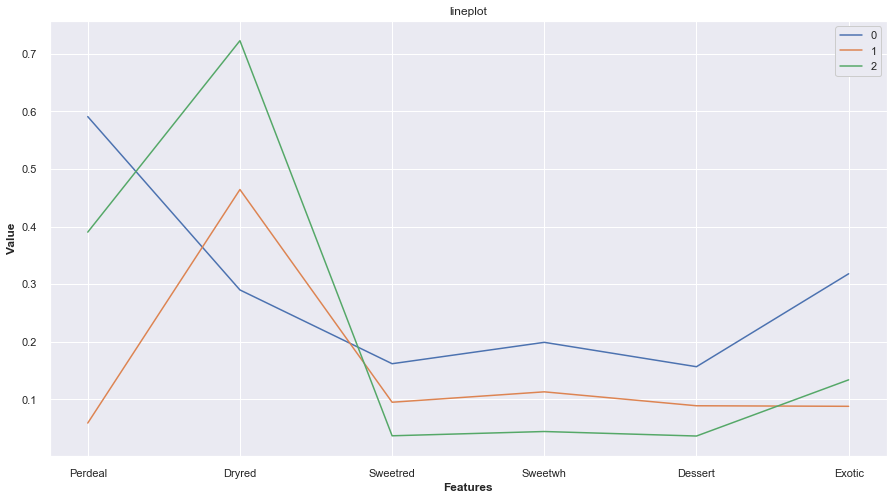

In [56]:
plt.subplots(figsize=(15,8))

sns.color_palette("Paired")
sns.lineplot(data=tastes.drop(columns=["labels"]).T, dashes=False)

plt.xlabel('Features', fontweight ='bold') 
plt.ylabel('Value', fontweight ='bold') 

plt.title("lineplot")
plt.legend(framealpha=1, frameon=True)
plt.show()

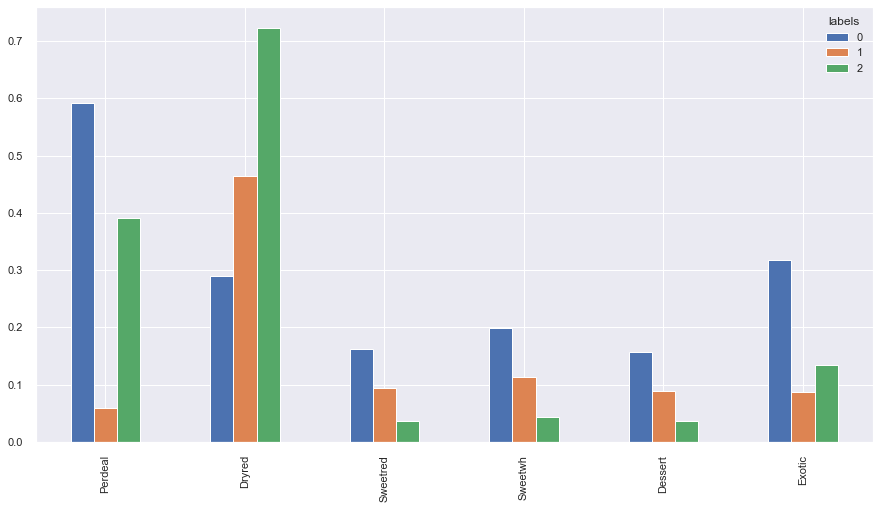

In [57]:
tastes.drop(columns=["labels"]).T.plot(kind="bar", figsize=(15,8))
plt.show()

In [58]:
# 0: discount purchase, sweetred -> sweet they like sweet + so krasses zeugs
# 1: dryred too 
# 2: like dryred a lot, also like to purchase wenn discounted

# Annex

In [59]:
# Overview scaled - paar ausgesucht für die plots
df_analysis = pd.concat((df_scaled, pd.Series(km_labels, name='labels')), axis=1).groupby("labels").agg({"labels": "count",
                                          "Age": "mean",
                                          "Monetary": "mean",
                                          "Recency": "mean",
                                          "Freq": "mean",
                                          "Income": "mean",
                                          "LTV": "mean",
                                          "Dryred": "mean"})
df_analysis

,labels,Age,Monetary,Recency,Freq,Income,LTV,Dryred
labels,,,,,,,,
0,2970,0.177379,0.027188,0.146138,0.056149,0.232345,0.090932,0.289878
1,3494,0.811262,0.437613,0.091180,0.489025,0.680614,0.357233,0.464277
2,3536,0.459988,0.117189,0.108632,0.170367,0.429226,0.126580,0.722830


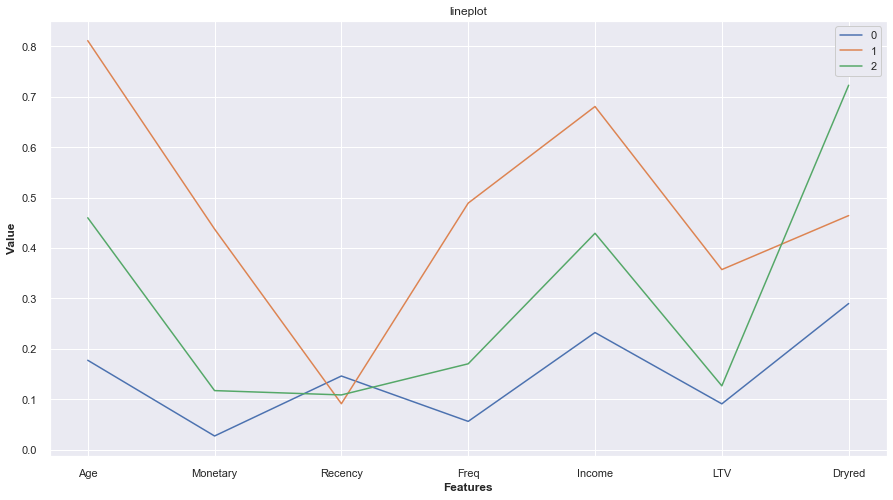

In [60]:
plt.subplots(figsize=(15,8))

sns.color_palette("Paired")
sns.lineplot(data=df_analysis.drop(columns=["labels"]).T, dashes=False)

plt.xlabel('Features', fontweight ='bold') 
plt.ylabel('Value', fontweight ='bold') 

plt.title("lineplot")
plt.legend(framealpha=1, frameon=True)
plt.show()

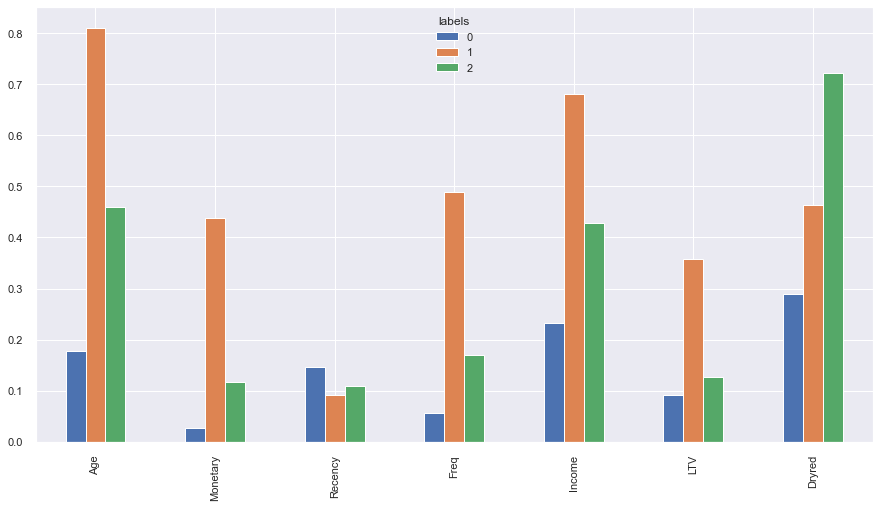

In [61]:
df_analysis.drop(columns=["labels"]).T.plot(kind="bar", figsize=(15,8))
plt.show()